In [1]:
import sqlite3

from main import setup1, setup2

# setup1()
# setup2()

# from django.db import connection 

import psycopg2

In [3]:
from notebook_utils.queries import run_query, run_query_file

In [4]:
run_query_file(
    'sql_queries/views/games_with_numplayers.sql',
    fetch=False
)
run_query_file(
    'sql_queries/views/player_with_numturns.sql',
    fetch=False
)
run_query_file(
    'sql_queries/views/player_game_pair.sql',
    fetch=False
)

In [5]:

rows = run_query_file(
    'sql_queries/averages.sql'
)

print("name, numplayers, avg(number_of_turns), stddev (number_of_turns), variance (number_of_turns), min(number_of_turns), max(number_of_turns)")
for row in rows:
    print(", ".join([str(i) for i in row]))


name, numplayers, avg(number_of_turns), stddev (number_of_turns), variance (number_of_turns), min(number_of_turns), max(number_of_turns)
NewBiggestFirst, 1, 13.6060000000000000, 4.3646745759175981, 19.0503841536614646, 4, 43
NewBiggestFirst, 2, 13.5536000000000000, 4.5778622436976221, 20.9568227222722272, 4, 67
NewBiggestFirst, 3, 13.5537333333333333, 4.6948676425469431, 22.0417821810342912, 2, 112
Replacement, 1, 13.7320000000000000, 5.7286388366843713, 32.8173029211684674, 4, 90
Replacement, 2, 14.0606000000000000, 8.9347809526069024, 79.8303106710671067, 4, 306
Replacement, 3, 14.5298000000000000, 14.0464704528271257, 197.3033321821454764, 2, 845
Tunnels, 1, 14.0240000000000000, 4.3210754074733327, 18.6716926770708283, 5, 46
Tunnels, 2, 14.1084000000000000, 4.4066757674160591, 19.4187913191319132, 4, 43
Tunnels, 3, 14.1327333333333333, 4.4283355645901237, 19.6101558726137298, 2, 48


In [59]:
import matplotlib.pyplot as plt 
import numpy as np

query_1 = '''
    SELECT
        name, numplayers
    FROM
        player_game_pair
    GROUP BY
        name, numplayers
    ORDER BY
        name, numplayers
    '''

players = run_query(
    query_1
)
print(players)
print(f"{len(players)} number of players")
def make_graph_for(player, ax, mx = 100):
    name, numplayers = player
    query_1 = '''
        SELECT
            number_of_turns
        FROM
            player_with_numturns
        WHERE name = '{}' AND numplayers = {}        
        
        '''.format(name, numplayers)

    data= run_query(
        query_1
    )
    data = [i[0] for i in data]
    # Define the bin edges for groups of 5
    bin_size = 2
    # mx = max(data)
    # mx = 100
    bin_edges = range(0, mx + bin_size, bin_size)

    # Create histogram
    ax.hist(data, bins=bin_edges, edgecolor='black')

    # Add titles and labels
    ax.set_title(f'{name}, {numplayers} players')
    
    # ax.xlabel('Value Range')
    # ax.ylabel('Frequency')



[('NewBiggestFirst', 1), ('NewBiggestFirst', 2), ('NewBiggestFirst', 3), ('Replacement', 1), ('Replacement', 2), ('Replacement', 3), ('Tunnels', 1), ('Tunnels', 2), ('Tunnels', 3)]
9 number of players


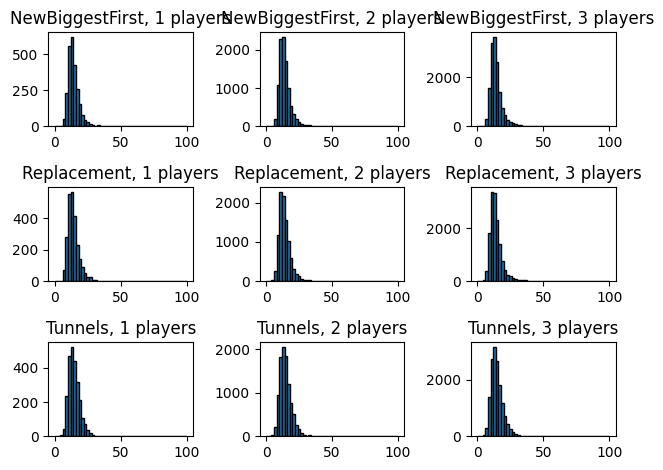

In [34]:
fig, ax = plt.subplots(3, 3)
# plt.subplots_adjust(wspace=2, hspace=2)

for i in range(3):
    for j in range(3):
        make_graph_for(players[3*i + j], ax[i][j])
        
plt.tight_layout()

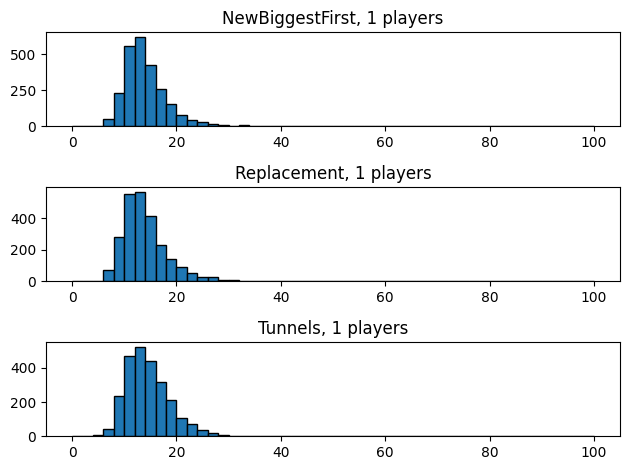

In [55]:
fig, ax = plt.subplots(3)
# plt.subplots_adjust(wspace=2, hspace=2)

for i in range(3):
    make_graph_for(players[3*i], ax[i])
        
plt.tight_layout()

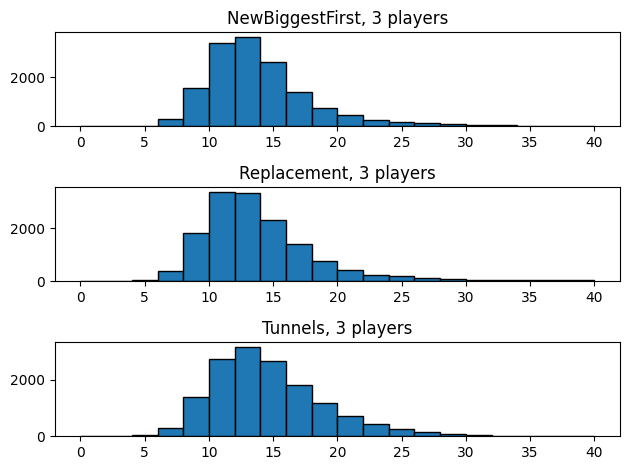

In [60]:
fig, ax = plt.subplots(3)
# plt.subplots_adjust(wspace=2, hspace=2)

for i in range(3):
    make_graph_for(players[3*i+2], ax[i], mx = 40)
        
plt.tight_layout()

In [35]:


# def make_graph_for(player):
#     name, numplayers = player
#     query_1 = '''
#         SELECT
#             number_of_turns
#         FROM
#             player_with_numturns
#         WHERE name = '{}' AND numplayers = {}        
        
#         '''.format(name, numplayers)
#     data= run_query(
#         query_1
#     )
    
#     data = [i[0] for i in data]
#     bin_size = 2
#     mx = max(data)
#     mx = 100
#     bin_edges = range(0, mx + bin_size, bin_size)

#     # Create histogram
#     plt.hist(data, bins=bin_edges, edgecolor='black', histtype='step')
# plt.title(players[0][0])
# make_graph_for(players[0])
# make_graph_for(players[1])
# make_graph_for(players[2])
# plt.show()

In [36]:
# plt.title(players[3][0])
# make_graph_for(players[3])
# make_graph_for(players[4])
# make_graph_for(players[5])
# plt.show()

In [37]:
# plt.title(players[6][0])
# make_graph_for(players[6])
# make_graph_for(players[7])
# make_graph_for(players[8])
# plt.show()

In [ ]:
from notebook_utils.dataframes import get_df



In [39]:

# Get summary statistics
df = get_df()
statistics = df.groupby(['name', 'numplayers']).describe()
statistics

numturns                                         \
                              count       mean        std  min   25%   50%   
name            numplayers                                                   
NewBiggestFirst 1            2500.0  13.606000   4.364675  4.0  11.0  13.0   
                2           10000.0  13.553600   4.577862  4.0  11.0  13.0   
                3           15000.0  13.553733   4.694868  2.0  11.0  13.0   
Replacement     1            2500.0  13.732000   5.728639  4.0  11.0  13.0   
                2           10000.0  14.060600   8.934781  4.0  10.0  13.0   
                3           15000.0  14.529800  14.046470  2.0  10.0  13.0   
Tunnels         1            2500.0  14.024000   4.321075  5.0  11.0  13.0   
                2           10000.0  14.108400   4.406676  4.0  11.0  13.0   
                3           15000.0  14.132733   4.428336  2.0  11.0  13.0   

                                         
                             75%    max  
name            numplayers               
NewBiggestFirst 1           15.0   43.0  
                2           15.0   67.0  
                3           15.0  112.0  
Replacement     1           15.0   90.0  
                2           16.0  306.0  
                3           15.0  845.0  
Tunnels         1           16.0   46.0  
                2           16.0   43.0  
                3           16.0   48.0

In [40]:








# # Get summary statistics
# df = get_df(players[1])
# statistics = df.describe()
# print(players[1][0] , ',', players[1][1])
# statistics

In [41]:


# # Get summary statistics
# df = get_df(players[2])
# statistics = df.describe()
# print(players[2][0] , ',', players[2][1])
# statistics

In [42]:
# query_1 = '''
#     SELECT
#         count(turns.id) as number_of_turns,
#         turns.game_id as game_id,
#         player.name as name,
#         turns.turn_type as type
#     FROM
#         db_player as player
#     JOIN 
#         db_turn as turns ON turns.player_id = player.id
#     GROUP BY
#         turns.game_id,
#         turns.player_id,
#         turns.turn_type
#     '''
# query_2 = '''
#     SELECT
#         avg(number_of_turns),
#         name,
#         type
#     FROM
#         ({})
#     GROUP BY
#         name,
#         type
# '''.format(query_1)

# data = run_query(
#     query_2
# )



In [43]:

"""select name, count(game_id) from (SELECT
        count(turns.id) as number_of_turns,
        turns.game_id as game_id,
        player.name as name,
        turns.turn_type as type
    FROM
        db_player as player
    JOIN 
        db_turn as turns ON turns.player_id = player.id
    GROUP BY
        turns.game_id,
        turns.player_id,
        turns.turn_type
        ) where number_of_turns > 100 GROUP BY name"""


'select name, count(game_id) from (SELECT\n        count(turns.id) as number_of_turns,\n        turns.game_id as game_id,\n        player.name as name,\n        turns.turn_type as type\n    FROM\n        db_player as player\n    JOIN \n        db_turn as turns ON turns.player_id = player.id\n    GROUP BY\n        turns.game_id,\n        turns.player_id,\n        turns.turn_type\n        ) where number_of_turns > 100 GROUP BY name'

In [44]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h



In [45]:
from statistics import NormalDist

def confidence_interval(data, confidence=0.95):
  dist = NormalDist.from_samples(data)
  z = NormalDist().inv_cdf((1 + confidence) / 2.)
  h = dist.stdev * z / ((len(data) - 1) ** .5)
  return dist.mean - h, dist.mean + h



In [63]:

print(f'name,#players,mean,low,high,size,')
for player in players:
    name, numplayers = player
    df = get_df()
    df1 = df[(df['name'] == name) & (df['numplayers'] == numplayers)] # df.query(f'name == "{name}"').query(f'numplayers == {numplayers}')    
    mean, low, high = mean_confidence_interval(df1['numturns'])
    
    print(f'{ name:15},{ numplayers },{ float(mean):5.5f},{ float(low):5.5f},{ float(high):5.5f},{ len(df1.index):4d}')
    # print(f'name={ name:15} #players={ numplayers } mean={ float(mean):5.5f} low={ float(low):5.5f} high={ float(high):5.5f} size={ len(df1.index):4d}')

name,#players,mean,low,high,size,
NewBiggestFirst,1,13.60600,13.43482,13.77718,2500
NewBiggestFirst,2,13.55360,13.46386,13.64334,10000
NewBiggestFirst,3,13.55373,13.47860,13.62887,15000
Replacement    ,1,13.73200,13.50733,13.95667,2500
Replacement    ,2,14.06060,13.88546,14.23574,10000
Replacement    ,3,14.52980,14.30500,14.75460,15000
Tunnels        ,1,14.02400,13.85453,14.19347,2500
Tunnels        ,2,14.10840,14.02202,14.19478,10000
Tunnels        ,3,14.13273,14.06186,14.20361,15000


In [65]:

def ttest(player1, player2):
    name1, numplayers1 = player1
    name2, numplayers2 = player2
    df = get_df()
    df1 = df[(df['name'] == name1) & (df['numplayers'] == numplayers1)]
    df2 = df[(df['name'] == name2) & (df['numplayers'] == numplayers2)]

    r = scipy.stats.ttest_ind(df1['numturns'], df2['numturns'], equal_var=False)
    print(f"{name1}({numplayers1}) v {name2}({numplayers2}) p={r.pvalue} (rstat={r.statistic})")

In [66]:
ttest(players[0], players[3])
ttest(players[0], players[6])
ttest(players[3], players[6])

NewBiggestFirst(1) v Replacement(1) p=0.3817460002075228 (rstat=-0.8747664304531065)
NewBiggestFirst(1) v Tunnels(1) p=0.0006719985617594962 (rstat=-3.402894528227609)
Replacement(1) v Tunnels(1) p=0.041939956142999404 (rstat=-2.034677795985225)


In [67]:
ttest(players[1+0], players[1+3])
ttest(players[1+0], players[1+6])
ttest(players[1+3], players[1+6])

NewBiggestFirst(2) v Replacement(2) p=4.46643763207784e-07 (rstat=-5.050163198530697)
NewBiggestFirst(2) v Tunnels(2) p=2.713238904851738e-18 (rstat=-8.73125922441329)
Replacement(2) v Tunnels(2) p=0.631373378976926 (rstat=-0.4798048168781809)


In [68]:
ttest(players[2+0], players[2+3])
ttest(players[2+0], players[2+6])
ttest(players[2+3], players[2+6])

NewBiggestFirst(3) v Replacement(3) p=7.362597536238917e-16 (rstat=-8.071627817068523)
NewBiggestFirst(3) v Tunnels(3) p=4.955730300230621e-28 (rstat=-10.987694765123196)
Replacement(3) v Tunnels(3) p=0.0009621493360385552 (rstat=3.301914173941292)


In [69]:
ttest(players[0], players[1])
ttest(players[0], players[2])
ttest(players[1], players[2])

NewBiggestFirst(1) v NewBiggestFirst(2) p=0.5950273984091836 (rstat=0.5316076240384603)
NewBiggestFirst(1) v NewBiggestFirst(3) p=0.5835777291053357 (rstat=0.5482167225679361)
NewBiggestFirst(2) v NewBiggestFirst(3) p=0.9982182962219365 (rstat=-0.0022330620048334466)


In [70]:
ttest(players[3+0], players[3+1])
ttest(players[3+0], players[3+2])
ttest(players[3+1], players[3+2])

Replacement(1) v Replacement(2) p=0.023755653517903316 (rstat=-2.2616423807643913)
Replacement(1) v Replacement(3) p=8.758394849269152e-07 (rstat=-4.921272496792149)
Replacement(2) v Replacement(3) p=0.0012512165778032851 (rstat=-3.227309209826317)


In [71]:
ttest(players[6+0], players[6+1])
ttest(players[6+0], players[6+2])
ttest(players[6+1], players[6+2])

Tunnels(1) v Tunnels(2) p=0.38433690707681767 (rstat=-0.8700311463027074)
Tunnels(1) v Tunnels(3) p=0.2458512649999544 (rstat=-1.1606836857180272)
Tunnels(2) v Tunnels(3) p=0.669466678290116 (rstat=-0.42688594447757866)


In [54]:
'''
 * ( ) record computational time
 * ( ) Higher computational time will correlate with game performance (# turns to win)
 * ( ) Having the first turn will correlate with win %
 * ( ) Lower # cards drawn and immediately discarded will correlate with lower # turns to win (better game performance)
 * ( ) Higher # discards used will correlate with lower # turns to win (better game performance)
 * (✓) Replacement will outperform Tunnels which will outperform BiggestFirst
'''

'\n * ( ) record computational time\n * ( ) Higher computational time will correlate with game performance (# turns to win)\n * ( ) Having the first turn will correlate with win %\n * ( ) Lower # cards drawn and immediately discarded will correlate with lower # turns to win (better game performance)\n * ( ) Higher # discards used will correlate with lower # turns to win (better game performance)\n * (✓) Replacement will outperform Tunnels which will outperform BiggestFirst\n'

In [ ]:
from notebook_utils.dataframes import get_stats_df
import pandas as pd


In [82]:
df = get_stats_df()
statistics = df.groupby(['name']).describe()
statistics

numturns                                                      \
                   count       mean        std  min   25%   50%   75%    max   
name                                                                           
NewBiggestFirst  27500.0  13.558436   4.623208  2.0  11.0  13.0  15.0  112.0   
Replacement      27500.0  14.286655  11.819695  2.0  10.0  13.0  15.0  845.0   
Tunnels          27500.0  14.114000   4.410760  2.0  11.0  13.0  16.0   48.0   

                numdiscards            ... percentdraws      percentnones  \
                      count      mean  ...          75%  max        count   
name                                   ...                                  
NewBiggestFirst     27500.0  5.723745  ...     0.666667  1.0      27500.0   
Replacement         27500.0  7.177491  ...     0.500000  1.0      27500.0   
Tunnels             27500.0  5.498982  ...     0.714286  1.0      27500.0   

                                                                           
                     mean       std  min  25%     50%       75%       max  
name                                                                       
NewBiggestFirst  0.000000  0.000000  0.0  0.0  0.0000  0.000000  0.000000  
Replacement      0.065415  0.073394  0.0  0.0  0.0625  0.111111  0.461538  
Tunnels          0.000000  0.000000  0.0  0.0  0.0000  0.000000  0.000000  

[3 rows x 56 columns]

In [ ]:
from notebook_utils.graphs.scatterplots import scatterplot

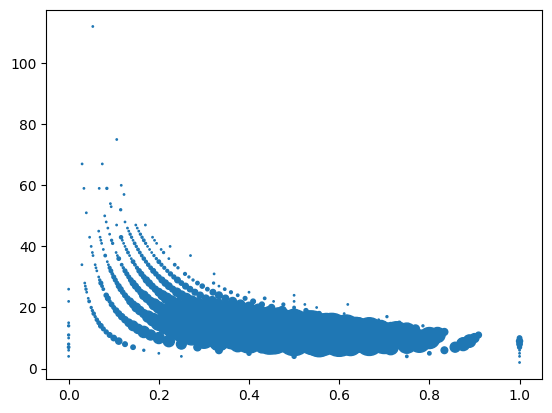

In [128]:
scatterplot(df, 'NewBiggestFirst', xfield='percentdiscards', yfield='numturns', field="discards")

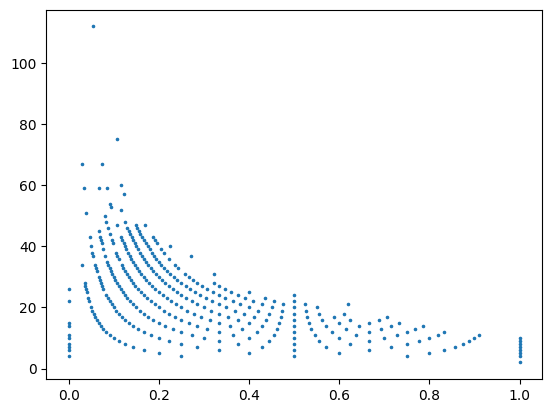

In [131]:
scatterplot(df, 'NewBiggestFirst', xfield='percentdiscards', yfield='numturns', field="discards", show_size=False)

In [132]:

print(f'name,#players,mean,low,high,size,')
for player in players:
    name, numplayers = player
    df = get_df()
    df1 = df[(df['name'] == name) & (df['numplayers'] == numplayers)] # df.query(f'name == "{name}"').query(f'numplayers == {numplayers}')    
    mean, low, high = mean_confidence_interval(df1['numturns'])
    
    print(f'{ name:15},{ numplayers },{ float(mean):5.5f},{ float(low):5.5f},{ float(high):5.5f},{ len(df1.index):4d}')
    # print(f'name={ name:15} #players={ numplayers } mean={ float(mean):5.5f} low={ float(low):5.5f} high={ float(high):5.5f} size={ len(df1.index):4d}')

name,#players,mean,low,high,size,
NewBiggestFirst,1,13.60600,13.43482,13.77718,2500
NewBiggestFirst,2,13.55360,13.46386,13.64334,10000
NewBiggestFirst,3,13.55373,13.47860,13.62887,15000
Replacement    ,1,13.73200,13.50733,13.95667,2500
Replacement    ,2,14.06060,13.88546,14.23574,10000
Replacement    ,3,14.52980,14.30500,14.75460,15000
Tunnels        ,1,14.02400,13.85453,14.19347,2500
Tunnels        ,2,14.10840,14.02202,14.19478,10000
Tunnels        ,3,14.13273,14.06186,14.20361,15000


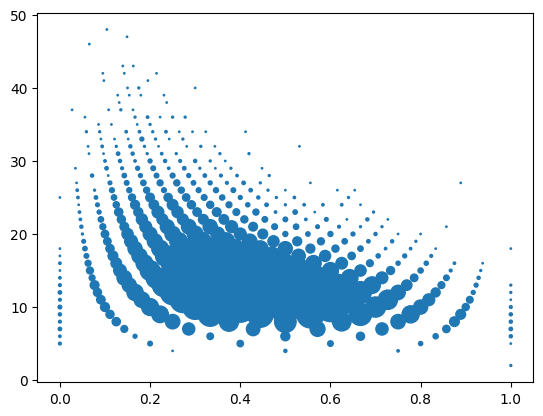

In [133]:
scatterplot(df, 'Tunnels', xfield='percentdiscards', yfield='numturns', field="discards")

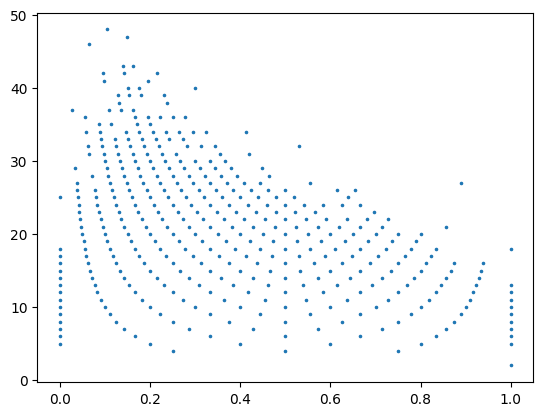

In [134]:
scatterplot(df, 'Tunnels', xfield='percentdiscards', yfield='numturns', field="discards", show_size=False)

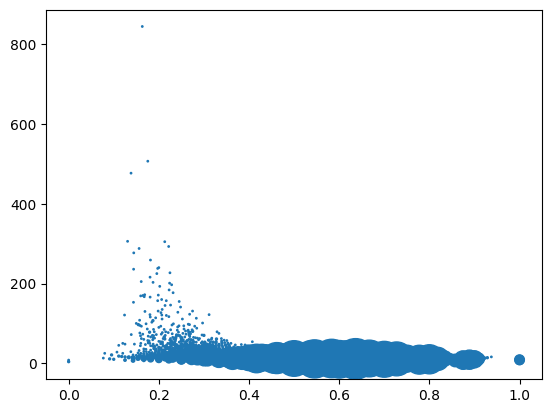

In [135]:
scatterplot(df, 'Replacement', xfield='percentdiscards', yfield='numturns', field="discards")

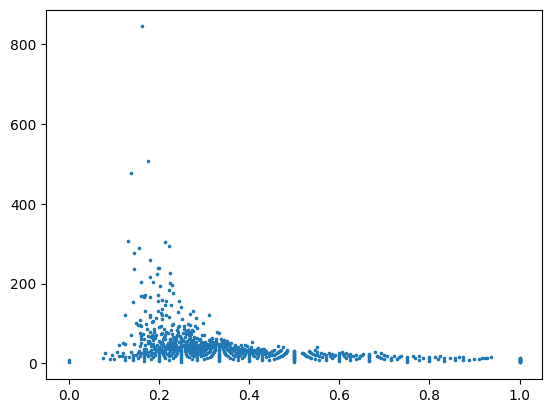

In [136]:
scatterplot(df, 'Replacement', xfield='percentdiscards', yfield='numturns', field="discards", show_size=False)

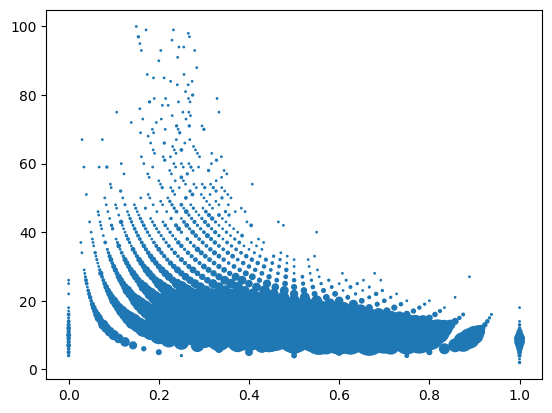

In [137]:
scatterplot(df, 'Replacement', xfield='percentdiscards', yfield='numturns', field="discards", max_turns=100)

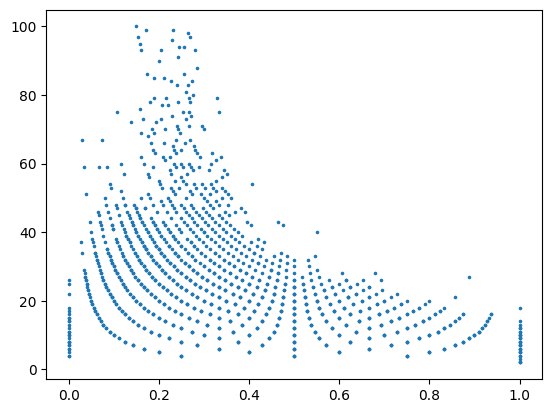

In [140]:
scatterplot(df, 'Replacement', xfield='percentdiscards', yfield='numturns', field="discards", max_turns=100, show_size=False)

In [ ]:

print(f'name,#players,mean,low,high,size,')
for player in players:
    name, numplayers = player
    df = get_df()
    df1 = df[(df['name'] == name) & (df['numplayers'] == numplayers)] # df.query(f'name == "{name}"').query(f'numplayers == {numplayers}')    
    mean, low, high = mean_confidence_interval(df1['numturns'])
    
    print(f'{ name:15},{ numplayers },{ float(mean):5.5f},{ float(low):5.5f},{ float(high):5.5f},{ len(df1.index):4d}')
    # print(f'name={ name:15} #players={ numplayers } mean={ float(mean):5.5f} low={ float(low):5.5f} high={ float(high):5.5f} size={ len(df1.index):4d}')

name,#players,mean,low,high,size,
NewBiggestFirst,1,13.60600,13.43482,13.77718,2500
NewBiggestFirst,2,13.55360,13.46386,13.64334,10000
NewBiggestFirst,3,13.55373,13.47860,13.62887,15000
Replacement    ,1,13.73200,13.50733,13.95667,2500
Replacement    ,2,14.06060,13.88546,14.23574,10000
Replacement    ,3,14.52980,14.30500,14.75460,15000
Tunnels        ,1,14.02400,13.85453,14.19347,2500
Tunnels        ,2,14.10840,14.02202,14.19478,10000
Tunnels        ,3,14.13273,14.06186,14.20361,15000


In [139]:
scatterplot(df, 'NewBiggestFirst', xfield='percentdraws', yfield='numturns')

TypeError: scatterplot() missing 1 required positional argument: 'field'

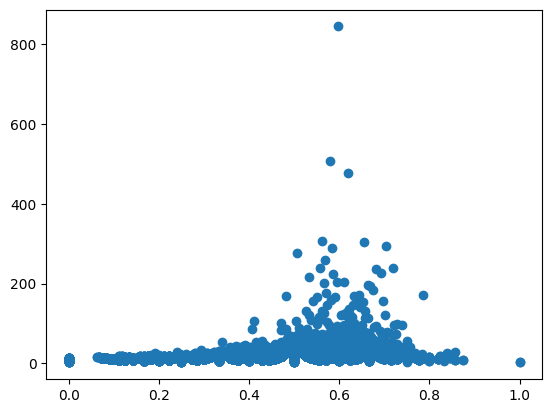

In [92]:
scatterplot(df, 'Replacement', xfield='percentdraws', yfield='numturns')

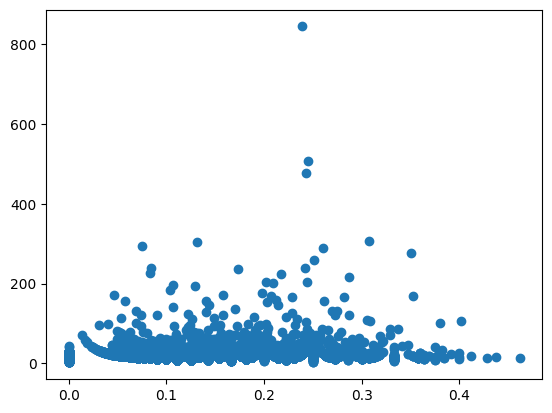

In [94]:
scatterplot(df, 'Replacement', xfield='percentnones', yfield='numturns')